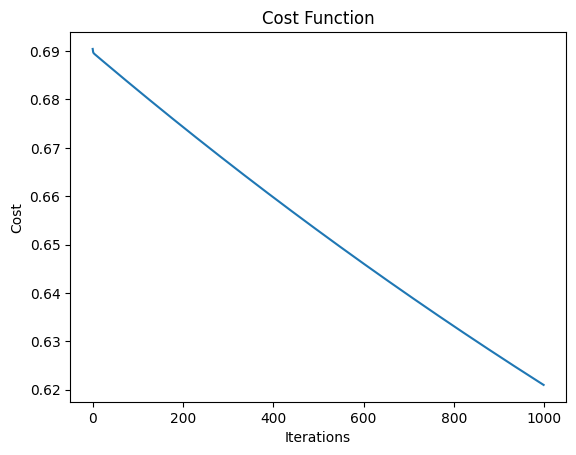

Training set accuracy: 0.7582417582417582
Testing set accuracy: 0.7456140350877193
Cross-validation scores: [0.8245614  0.85087719 0.87719298 0.9122807  0.89380531]
Mean cross-validation score: 0.8717435180872535
Confusion Matrix:
 [[14 29]
 [ 0 71]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    J = (-1/m) * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X @ theta)
        theta = theta - (alpha/m) * (X.T @ (h-y))
        J_history.append(compute_cost(theta, X, y))
    return theta, J_history

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data[:, 0]  # Use only one feature (mean radius)
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a column of ones to X for the intercept term
X_train = np.c_[np.ones(len(X_train)), X_train]
X_test = np.c_[np.ones(len(X_test)), X_test]

# Initialize the parameters
theta = np.zeros(X_train.shape[1])

# Set the learning rate and number of iterations
alpha = 0.01
num_iters = 1000

# Perform gradient descent to learn the parameters
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)

# Plot the cost function over iterations
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function")
plt.show()

# Compute the training set accuracy
h_train = sigmoid(X_train @ theta)
y_pred_train = np.round(h_train)
accuracy_train = np.mean(y_pred_train == y_train)
print("Training set accuracy:", accuracy_train)

# Compute the testing set accuracy
h_test = sigmoid(X_test @ theta)
y_pred_test = np.round(h_test)
accuracy_test = np.mean(y_pred_test == y_test)
print("Testing set accuracy:", accuracy_test)

# Perform cross-validation to estimate the model performance
scores = cross_val_score(LogisticRegression(), X.reshape(-1, 1), y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

# Create a confusion matrix of the testing set predictions
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cm)